In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [765]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [769]:
#pd.read_csv('noc_regions.csv')

## Montrez l’évolution du nombre de participants aux jeux Olympiques par saison

In [497]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

### Evolution aux JO d'été

In [29]:
summer_nbr_part_df = summer_df.groupby('Year')['ID'].count().to_frame('Nbres de participants')
summer_nbr_part_df.index = pd.to_datetime(summer_nbr_part_df.index, format='%Y')

#### Pandas plot

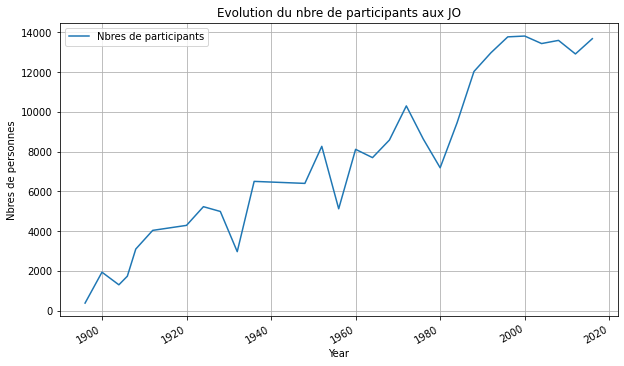

In [40]:
summer_nbr_part_df.plot(grid=True, 
                        ylabel='Nbres de personnes', 
                        title='Evolution du nbre de participants aux JO',
                        figsize=(10, 6))
plt.show()

#### Matplotlib plot

In [56]:
x = summer_nbr_part_df.index.strftime('%Y')
y = summer_nbr_part_df['Nbres de participants']

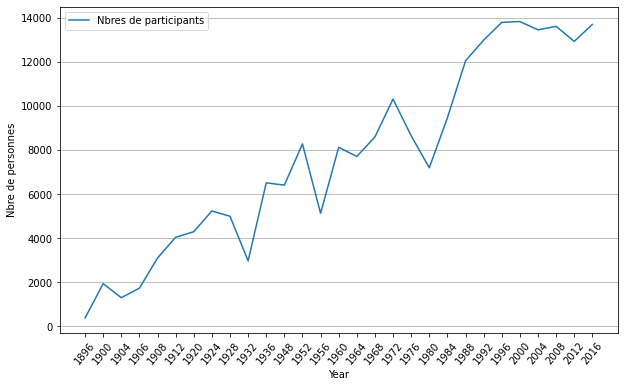

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Nbres de participants')
plt.xlabel('Year')
plt.ylabel('Nbre de personnes')
plt.grid(axis='y')
plt.xticks(rotation=50)
plt.legend()
plt.show()

#### Seaborn plot

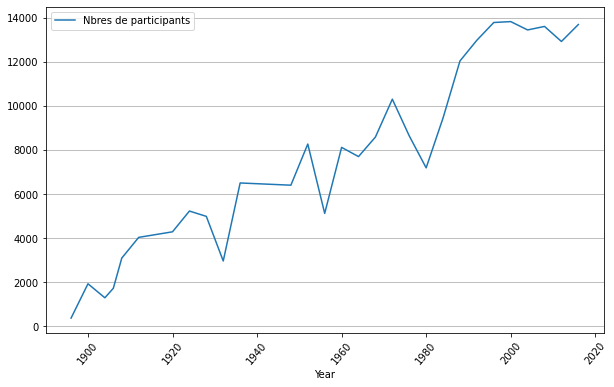

In [83]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=summer_nbr_part_df)
plt.grid(axis='y')
plt.xticks(rotation=50)
plt.show()

### Evolution au JO d'hiver

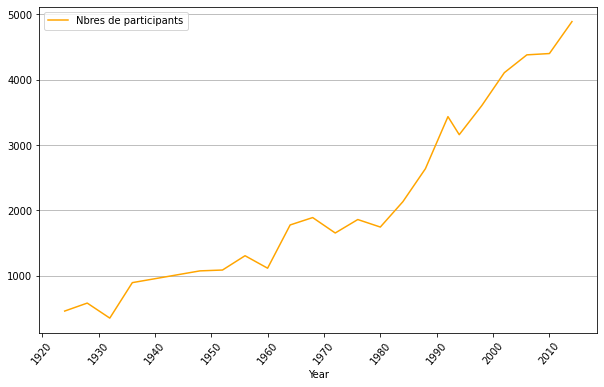

In [89]:
winter_nbr_part_df = winter_df.groupby('Year')['ID'].count().to_frame('Nbres de participants')
winter_nbr_part_df.index = pd.to_datetime(winter_nbr_part_df.index, format='%Y')

plt.figure(figsize=(10, 6))
sns.lineplot(data=winter_nbr_part_df, palette=['orange'])
plt.grid(axis='y')
plt.xticks(rotation=50)
plt.show()


### Evolution Jo été/hiver

In [103]:
summer_tmp_df = summer_nbr_part_df.rename(columns={'Nbres de participants' : 'Summer'})
winter_tmp_df = winter_nbr_part_df.rename(columns={'Nbres de participants' : 'Winter'})


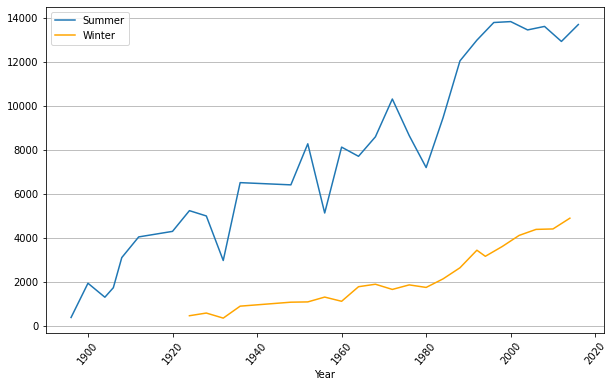

In [104]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=summer_tmp_df)
sns.lineplot(data=winter_tmp_df, palette=['orange'])
plt.grid(axis='y')
plt.xticks(rotation=50)
plt.show()

## Quelle est la distribution de l’âge des médaillées d’or ?

In [116]:
df['Age'].value_counts()

23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
        ...  
77.0        2
84.0        1
96.0        1
97.0        1
10.0        1
Name: Age, Length: 74, dtype: int64

/Users/blanchardnicolas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

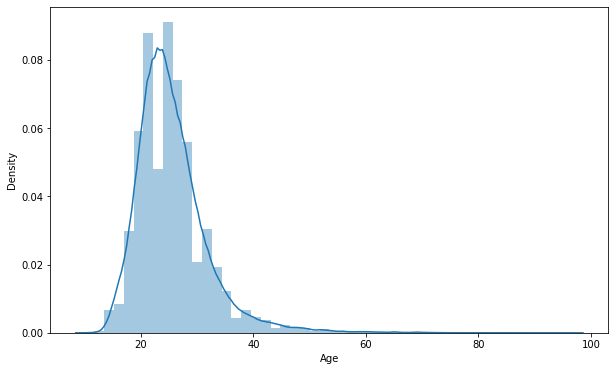

In [121]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Age'])

## Montrez l’évolution des âges au cours du temps par les saisons (hiver – été)

/Users/blanchardnicolas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/blanchardnicolas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

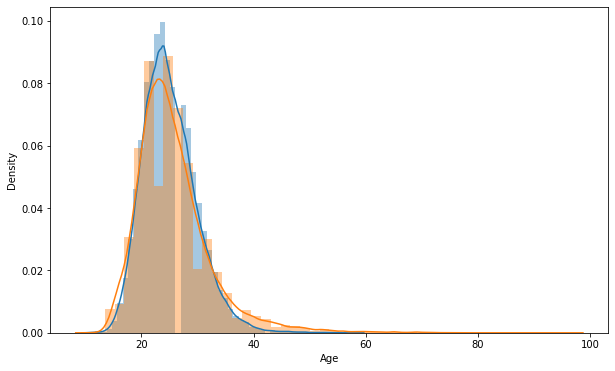

In [126]:
plt.figure(figsize=(10, 6))
sns.distplot(winter_df['Age'])
sns.distplot(summer_df['Age'])

## Quels sont les participants les plus jeunes et le plus vieux médaillé (or, argent et bronze) ?

In [131]:
#Participants les plus jeunes médaillé
df.groupby('Medal').min()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
Medal,,,,,,,,,,,,,,
Bronze,15,A. Dubois,F,10.0,136.0,28.0,A North American Team,AFG,1896 Summer,1896,Summer,Albertville,Alpine Skiing,Alpine Skiing Men's Combined
Gold,4,A. Albert,F,13.0,136.0,28.0,Algeria,ALG,1896 Summer,1896,Summer,Albertville,Aeronautics,Aeronautics Mixed Aeronautics
Silver,20,A. Dubois,F,11.0,136.0,30.0,Algeria,AHO,1896 Summer,1896,Summer,Albertville,Alpine Skiing,Alpine Skiing Men's Combined


In [132]:
#Participants les plus vieux médaillé
df.groupby('Medal').max()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
Medal,,,,,,,,,,,,,,
Bronze,135563,va Rakusz,M,72.0,223.0,182.0,Zimbabwe,ZIM,2016 Summer,2016,Winter,Vancouver,Wrestling,"Wrestling Women's Middleweight, Freestyle"
Gold,135553,ystein Pettersen,M,64.0,223.0,170.0,Zimbabwe,ZIM,2016 Summer,2016,Winter,Vancouver,Wrestling,"Wrestling Women's Middleweight, Freestyle"
Silver,135563,va Szkely (-Gyarmati),M,73.0,223.0,167.0,Zut,ZIM,2016 Summer,2016,Winter,Vancouver,Wrestling,"Wrestling Women's Middleweight, Freestyle"


## Montrez l’évolution du nombre de femmes au cours du temps par rapport aux hommes et selon les saisons ( hiver – été)

### été

In [517]:
summer_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,isMedal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,0
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,0


In [525]:
summer_tmp_df.reset_index().groupby(['Year', 'Sex'])[['ID']].count()

ID
Year Sex      
1896 M     380
1900 F      33
     M    1903
1904 F      16
     M    1285
1906 F      11
     M    1722
1908 F      47
     M    3054
1912 F      87
     M    3953
1920 F     134
     M    4158
1924 F     244
     M    4989
1928 F     404
     M    4588
1932 F     347
     M    2622
1936 F     468
     M    6038
1948 F     628
     M    5777
1952 F    1497
     M    6773
1956 F     893
     M    4234
1960 F    1435
     M    6684
1964 F    1348
     M    6354
1968 F    1777
     M    6811
1972 F    2193
     M    8111
1976 F    2172
     M    6469
1980 F    1756
     M    5435
1984 F    2447
     M    7007
1988 F    3543
     M    8494
1992 F    4124
     M    8853
1996 F    5008
     M    8772
2000 F    5431
     M    8390
2004 F    5546
     M    7897
2008 F    5816
     M    7786
2012 F    5815
     M    7105
2016 F    6223
     M    7465

In [526]:
tt

ID        
Sex        F       M
Year                
1896     NaN   380.0
1900    33.0  1903.0
1904    16.0  1285.0
1906    11.0  1722.0
1908    47.0  3054.0
1912    87.0  3953.0
1920   134.0  4158.0
1924   244.0  4989.0
1928   404.0  4588.0
1932   347.0  2622.0
1936   468.0  6038.0
1948   628.0  5777.0
1952  1497.0  6773.0
1956   893.0  4234.0
1960  1435.0  6684.0
1964  1348.0  6354.0
1968  1777.0  6811.0
1972  2193.0  8111.0
1976  2172.0  6469.0
1980  1756.0  5435.0
1984  2447.0  7007.0
1988  3543.0  8494.0
1992  4124.0  8853.0
1996  5008.0  8772.0
2000  5431.0  8390.0
2004  5546.0  7897.0
2008  5816.0  7786.0
2012  5815.0  7105.0
2016  6223.0  7465.0

<AxesSubplot:xlabel='Year'>

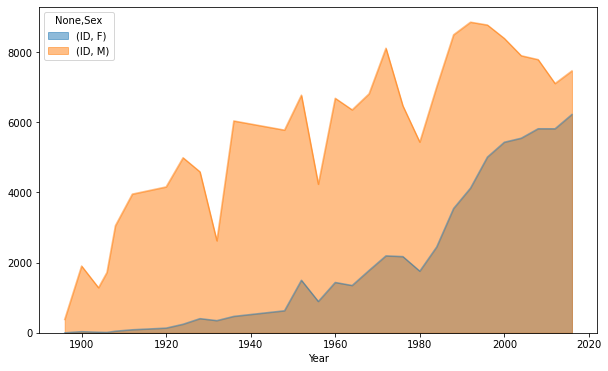

In [185]:
summer_tmp_df = summer_df.set_index('Year')
#summer_tmp_df = summer_tmp_df[['Sex']]
tt = summer_tmp_df.reset_index().groupby(['Year', 'Sex'])[['ID']].count().unstack()
tt.plot(kind='area',
        stacked=False,
        figsize=(10, 6))



<AxesSubplot:xlabel='Year'>

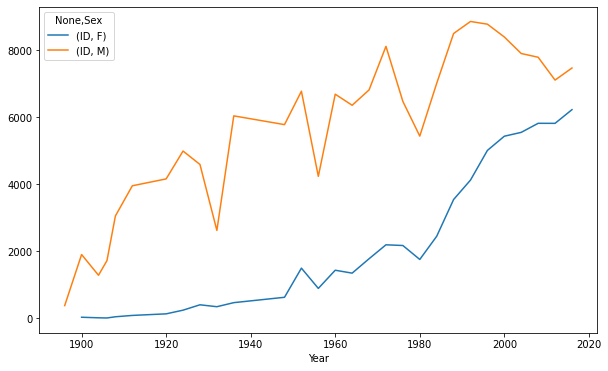

In [198]:
summer_tmp_df = summer_df.set_index('Year')
#summer_tmp_df = summer_tmp_df[['Sex']]
summer_tt = summer_tmp_df.reset_index().groupby(['Year', 'Sex'])[['ID']].count().unstack()
summer_tt.plot(figsize=(10, 6))





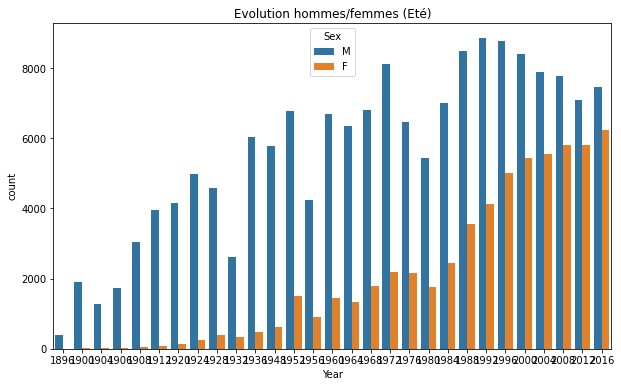

In [192]:
plt.figure(figsize=(10, 6))
sns.countplot(data=summer_df,
              x='Year',
              hue='Sex')
plt.title('Evolution hommes/femmes (Eté)')
plt.show()

### hiver

<AxesSubplot:xlabel='Year'>

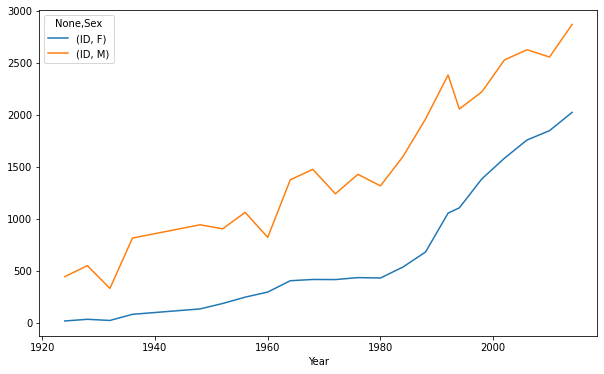

In [199]:
winter_tmp_df = winter_df.set_index('Year')
#summer_tmp_df = summer_tmp_df[['Sex']]
winter_tt = winter_tmp_df.reset_index().groupby(['Year', 'Sex'])[['ID']].count().unstack()
winter_tt.plot(figsize=(10, 6))

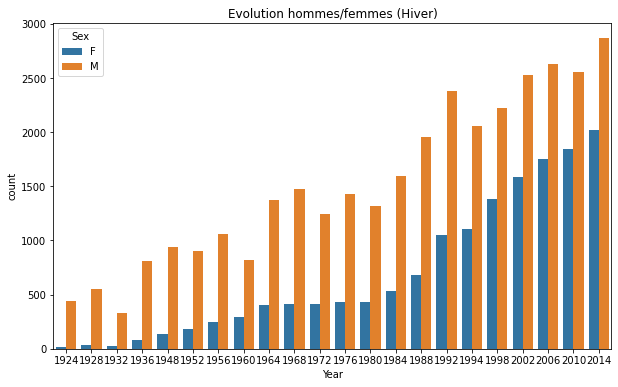

In [195]:
plt.figure(figsize=(10, 6))
sns.countplot(data=winter_df,
              x='Year',
              hue='Sex')
plt.title('Evolution hommes/femmes (Hiver)')
plt.show()

### Ete/Hiver

In [203]:
summer_tt

ID        
Sex        F       M
Year                
1896     NaN   380.0
1900    33.0  1903.0
1904    16.0  1285.0
1906    11.0  1722.0
1908    47.0  3054.0
1912    87.0  3953.0
1920   134.0  4158.0
1924   244.0  4989.0
1928   404.0  4588.0
1932   347.0  2622.0
1936   468.0  6038.0
1948   628.0  5777.0
1952  1497.0  6773.0
1956   893.0  4234.0
1960  1435.0  6684.0
1964  1348.0  6354.0
1968  1777.0  6811.0
1972  2193.0  8111.0
1976  2172.0  6469.0
1980  1756.0  5435.0
1984  2447.0  7007.0
1988  3543.0  8494.0
1992  4124.0  8853.0
1996  5008.0  8772.0
2000  5431.0  8390.0
2004  5546.0  7897.0
2008  5816.0  7786.0
2012  5815.0  7105.0
2016  6223.0  7465.0

<AxesSubplot:xlabel='Year'>

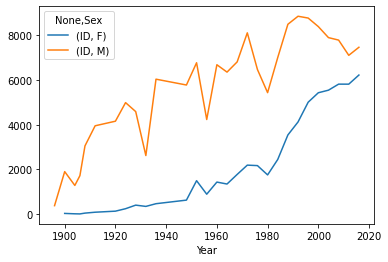

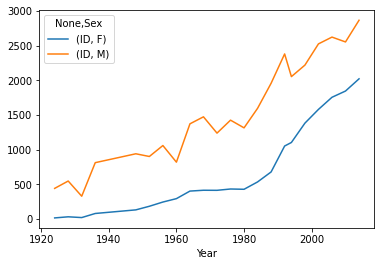

In [200]:
summer_tt.plot()
winter_tt.plot()

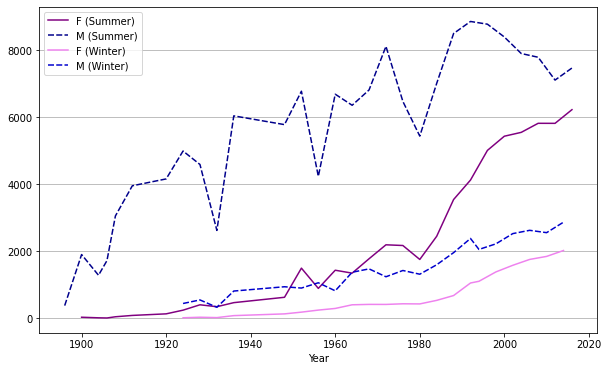

In [236]:
s = summer_tt.copy()
w = winter_tt.copy()
s.columns = ['F (Summer)', 'M (Summer)']
w.columns = ['F (Winter)', 'M (Winter)']

plt.figure(figsize=(10, 6))
sns.lineplot(data=s, palette=['purple', 'darkblue'])
sns.lineplot(data=w, palette=['violet', 'mediumblue'])
plt.grid(axis='y')
plt.show()

## Y- a – t-il des disciplines où les femmes sont plus présentes ?

In [240]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [505]:
tmp = df[df['Sex'] == 'F'].groupby(['Sport'])['ID'].count().to_frame('nbres femmes')
tmp = tmp.sort_values('nbres femmes', ascending=False)[:15]
tmp

,nbres femmes
Sport,
Athletics,11666
Swimming,9850
Gymnastics,9129
Alpine Skiing,3398
Cross Country Skiing,3385
Rowing,2193
Speed Skating,2081
Fencing,2000
Biathlon,1863


In [506]:
tmp.index

Index(['Athletics', 'Swimming', 'Gymnastics', 'Alpine Skiing',
       'Cross Country Skiing', 'Rowing', 'Speed Skating', 'Fencing',
       'Biathlon', 'Shooting', 'Volleyball', 'Hockey', 'Handball', 'Cycling',
       'Canoeing'],
      dtype='object', name='Sport')

/Users/blanchardnicolas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

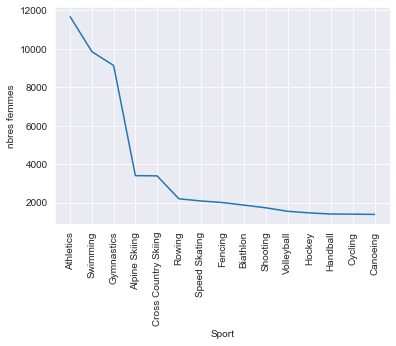

In [507]:
sns.lineplot(tmp.index, tmp['nbres femmes'])
plt.xticks(rotation=90)

## Quelles sont les différences de poids et de tailles entre les femmes et les hommes à travers les top 5 des disciplines

In [276]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [277]:
# 1) top 5 des disciplices
# 2) différence poids et tailles entre les femmes et les hommes

In [531]:
df.groupby('Sport')['ID'].count().to_frame('count')

,count
Sport,
Aeronautics,1
Alpine Skiing,8829
Alpinism,25
Archery,2334
Art Competitions,3578
...,...
Tug-Of-War,170
Volleyball,3404
Water Polo,3846


In [371]:
# 1) top 5 des disciplices
tmp = df.groupby('Sport')['ID'].count().to_frame('count')
tmp = tmp.sort_values('count', ascending=False)[:5]
tmp

,count
Sport,
Athletics,38624
Gymnastics,26707
Swimming,23195
Shooting,11448
Cycling,10859


In [372]:
# 2) différence poids et tailles entre les femmes et les hommes
tmp2 = df[df['Sport'].isin(tmp.index)]
tmp2 = tmp2.groupby(['Sport', 'Sex']).agg({'Height' : np.mean,
                                    'Weight' : np.mean})
tmp2

Height     Weight
Sport      Sex                       
Athletics  F    169.285714  60.239798
           M    179.768303  73.839129
Cycling    F    168.018629  59.770553
           M    177.745402  72.190234
Gymnastics F    156.143325  47.791276
           M    167.644438  63.343605
Shooting   F    164.932934  61.143243
           M    175.977163  77.834960
Swimming   F    171.468735  61.482748
           M    184.310928  78.040567

In [377]:
tmp2.reset_index()[::2]

,Sport,Sex,Height,Weight
0,Athletics,F,169.285714,60.239798
2,Cycling,F,168.018629,59.770553
4,Gymnastics,F,156.143325,47.791276
6,Shooting,F,164.932934,61.143243
8,Swimming,F,171.468735,61.482748


In [378]:
a = tmp2.reset_index()[['Height', 'Weight']][1::2].reset_index(drop=True)
b = tmp2.reset_index()[['Height', 'Weight']][::2].reset_index(drop=True)

a-b

,Height,Weight
0,10.482588,13.599330
1,9.726774,12.419681
2,11.501114,15.552329
3,11.044229,16.691717
4,12.842193,16.557818


In [385]:
x = tmp.reset_index()
x[['Height', 'Weight']] = a-b
x = x.drop(columns='count')
x.set_index('Sport')

,Height,Weight
Sport,,
Athletics,10.482588,13.599330
Gymnastics,9.726774,12.419681
Swimming,11.501114,15.552329
Shooting,11.044229,16.691717
Cycling,12.842193,16.557818


## Montrez le top 10 des pays ayant le plus de médailles par saison

In [784]:
df['isMedal'] = 1 - df['Medal'].isnull()

In [785]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,isMedal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,0


In [407]:
df.groupby(['Season', 'Team'], ).agg({'isMedal' : sum})

isMedal
Season Team                          
Summer 30. Februar                  0
       A North American Team        4
       Acipactli                    0
       Acturus                      0
       Afghanistan                  2
...                               ...
Winter West Germany-3               0
       Yugoslavia                   7
       Yugoslavia-1                 0
       Yugoslavia-2                 0
       Zimbabwe                     0

[1378 rows x 1 columns]

In [409]:
top10_country_summer_df = df[df['Season'] == 'Summer'].groupby(['Team'], )\
                            .agg({'isMedal' : sum})\
                            .sort_values('isMedal', ascending=False)\
                            .head(10)
top10_country_summer_df

,isMedal
Team,
United States,4686
Soviet Union,2061
Germany,1687
Great Britain,1598
France,1408
Italy,1384
Australia,1290
Hungary,1123
Sweden,1006


In [410]:
top10_country_winter_df = df[df['Season'] == 'Winter'].groupby(['Team'], )\
                            .agg({'isMedal' : sum})\
                            .sort_values('isMedal', ascending=False)\
                            .head(10)

top10_country_winter_df

,isMedal
Team,
Canada,575
United States,533
Norway,443
Sweden,428
Finland,426
Soviet Union,390
Germany,297
Austria,244
Russia,216


<AxesSubplot:ylabel='Team'>

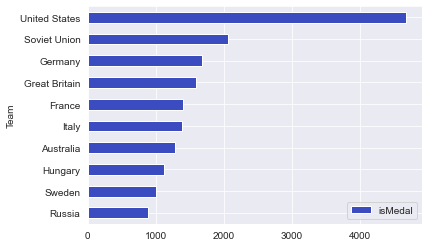

In [434]:
top10_country_summer_df.sort_values('isMedal').plot.barh(cmap='coolwarm')

<AxesSubplot:xlabel='isMedal', ylabel='Team'>

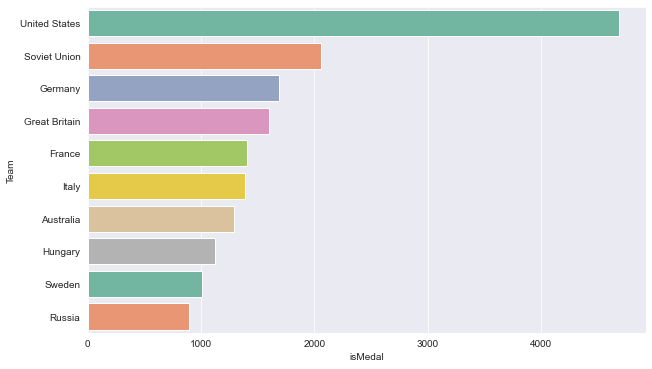

In [539]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.barplot(data=top10_country_summer_df.reset_index(),
            x='isMedal',
            y='Team',
            palette='Set2')

<AxesSubplot:xlabel='isMedal', ylabel='Team'>

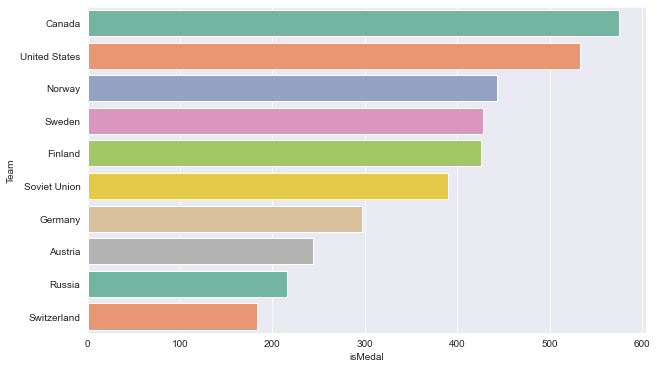

In [441]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.barplot(data=top10_country_winter_df.reset_index(),
            x='isMedal',
            y='Team',
            palette='Set2')

## Qui sont les joueurs ayant remporté le plus de médailles par saison ?

In [541]:
summer_df['Name'].value_counts().head(5).reset_index()

,index,Name
0,Robert Tait McKenzie,58
1,Heikki Ilmari Savolainen,39
2,"Joseph ""Josy"" Stoffel",38
3,Ioannis Theofilakis,36
4,Takashi Ono,33


In [447]:
summer_df['Name'].value_counts().head(5)

Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Name: Name, dtype: int64

/Users/blanchardnicolas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


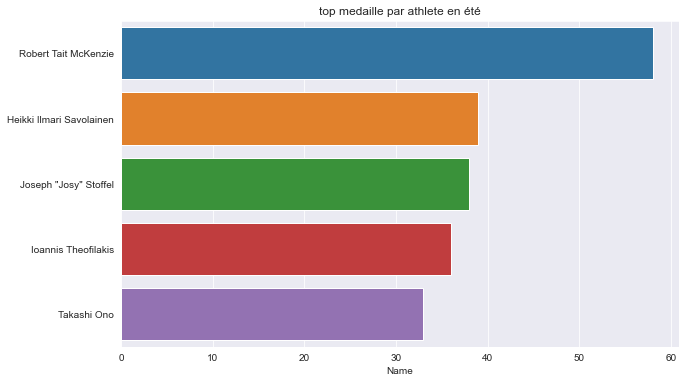

In [515]:
plt.figure(figsize=(10, 6))
sns.barplot(summer_df['Name'].value_counts().head(5),
            summer_df['Name'].value_counts().head(5).index, orient='h')
plt.title('top medaille par athlete en été')
plt.show()

/Users/blanchardnicolas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


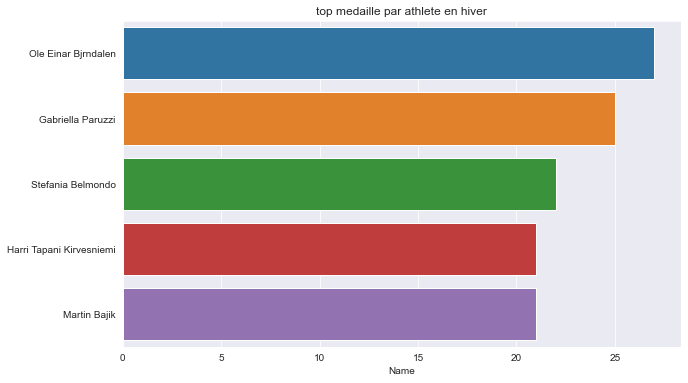

In [514]:
plt.figure(figsize=(10, 6))
sns.barplot(winter_df['Name'].value_counts().head(5),
            winter_df['Name'].value_counts().head(5).index, orient='h')
plt.title('top medaille par athlete en hiver')
plt.show()

## Y a-t-il des joueurs qui ont participé à plus d’une discipline ?

In [467]:
df.groupby('Name').agg({'Sport' : 'count'}).sort_values('Sport')

,Sport
Name,
"Gabrielle Marie ""Gabby"" Adcock (White-)",1
Lucien Laplace,1
Lucien Lafert,1
Lucien Konter,1
Lucien Koch,1
...,...
Takashi Ono,33
Ioannis Theofilakis,36
"Joseph ""Josy"" Stoffel",38


In [470]:
df[df['Name'] == 'Robert Tait McKenzie']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,isMedal
154798,77710,Robert Tait McKenzie,M,44.0,NaN,NaN,Canada,CAN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN,0
154799,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,0
154800,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,0
154801,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,0
154802,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,0
154803,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,0
154804,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,0
154805,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,0
154806,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Bronze,1
154807,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,0


In [468]:
df.groupby(['Name', 'Sport']).count()

,,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal,isMedal
Name,Sport,,,,,,,,,,,,,,
"Gabrielle Marie ""Gabby"" Adcock (White-)",Badminton,1,1,1,1,0,1,1,1,1,1,1,1,0,1
Eleonora Margarida Josephina Scmitt,Swimming,2,2,2,0,0,2,2,2,2,2,2,2,0,2
Jean Hauptmanns,Wrestling,1,1,1,0,0,1,1,1,1,1,1,1,0,1
Luis ngel Fernando de los Santos Grossi,Cycling,5,5,5,0,0,5,5,5,5,5,5,5,0,5
Th Anh,Fencing,1,1,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zge Krdar emberci,Volleyball,1,1,1,1,1,1,1,1,1,1,1,1,0,1
zlem Kaya,Athletics,2,2,2,2,2,2,2,2,2,2,2,2,0,2
zman Graud,Shooting,1,1,1,1,1,1,1,1,1,1,1,1,0,1


In [495]:
df.groupby(['Name', 'Sport']).count()\
                             .index.to_frame()['Name']\
                             .value_counts()\
                             .head(10)

Wang Nan                          5
Kim Seong-Eun                     5
Zhang Li                          5
Wolfgang Mller                    5
William Archibald "Bill" Irwin    4
Frantiek imnek                    4
Peter Schmid                      4
Wang Ying                         4
Alexander Viggo Jensen            4
Kim Yun-Mi                        4
Name: Name, dtype: int64

In [493]:
df[df['Name'] == 'Wang Nan']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,isMedal
256703,128537,Wang Nan,M,22.0,180.0,75.0,China,CHN,2010 Winter,2010,Winter,Vancouver,Speed Skating,Speed Skating Men's 500 metres,NaN,0
256704,128537,Wang Nan,M,22.0,180.0,75.0,China,CHN,2010 Winter,2010,Winter,Vancouver,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,0
256705,128538,Wang Nan,M,21.0,188.0,89.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Middleweight,NaN,0
256706,128539,Wang Nan,F,21.0,166.0,60.0,China,CHN,2000 Summer,2000,Summer,Sydney,Table Tennis,Table Tennis Women's Singles,Gold,1
256707,128539,Wang Nan,F,21.0,166.0,60.0,China-1,CHN,2000 Summer,2000,Summer,Sydney,Table Tennis,Table Tennis Women's Doubles,Gold,1
256708,128539,Wang Nan,F,25.0,166.0,60.0,China,CHN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN,0
256709,128539,Wang Nan,F,25.0,166.0,60.0,China-1,CHN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,Gold,1
256710,128539,Wang Nan,F,29.0,166.0,60.0,China,CHN,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Singles,Silver,1
256711,128539,Wang Nan,F,29.0,166.0,60.0,China,CHN,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,Gold,1
256712,128540,Wang Nan,M,30.0,180.0,72.0,China,CHN,2008 Summer,2008,Summer,Beijing,Shooting,Shooting Men's Double Trap,NaN,0


## Combien y-a-t-il de pays qui n’ont jamais gagné des médailles ?

In [510]:
df[['Team', 'isMedal']].head()

,Team,isMedal
0,China,0
1,China,0
2,Denmark,0
3,Denmark/Sweden,1
4,Netherlands,0


In [786]:
df[['NOC', 'isMedal']].groupby('NOC')\
                       .sum()\
                       .sort_values('isMedal')\
                       .query('isMedal == 0')\
                       .count()

#df_[df_['isMedal'] == 0].count()

isMedal    81
dtype: int64

In [787]:
df[['NOC', 'isMedal']].groupby('NOC')\
                       .sum()\
                       .sort_values('isMedal')\
                       .query('isMedal == 0')

,isMedal
NOC,
GBS,0
SAA,0
SAM,0
SEY,0
HON,0
...,...
YAR,0
COD,0
AND,0


## Comparez le nombre de discipline individuelle et en équipe

In [568]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Ice Hockey Men's Ice Hockey",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

## Comparez le nombre de discipline par saison

In [575]:
df[['Season', 'Sport', 'Year']].head()

,Season,Sport,Year
0,Summer,Basketball,1992
1,Summer,Judo,2012
2,Summer,Football,1920
3,Summer,Tug-Of-War,1900
4,Winter,Speed Skating,1988


In [607]:
df_ = df[['Season', 'Sport', 'Year', 'ID']].groupby(['Season', 'Year', 'Sport']).count()
df_ = df_.index.to_frame()
df_.index = np.arange(906)
df_ = df_.groupby(['Season', 'Year']).count()
df_.reset_index().groupby(['Season'])['Sport'].mean().to_frame('Nbres de disciplines moyen')

,Nbres de disciplines moyen
Season,
Summer,23.172414
Winter,10.636364


## Quels sont les meilleurs disciplines sportives pour la Belgique ?

In [641]:
df_ = df[['NOC', 'Event', 'Medal', 'isMedal']]

In [650]:
df_.query('NOC=="BEL" and isMedal==1')\
   .groupby(['NOC', 'Event', 'isMedal']).count()\
   .nlargest(10, 'Medal')

Medal
NOC Event                                            isMedal       
BEL Water Polo Men's Water Polo                      1           54
    Fencing Men's epee, Team                         1           30
    Hockey Men's Hockey                              1           30
    Gymnastics Men's Team All-Around                 1           24
    Gymnastics Men's Team All-Around, Swedish System 1           24
    Football Men's Football                          1           23
    Cycling Men's Road Race, Team                    1           20
    Rowing Men's Coxed Eights                        1           18
    Fencing Men's Foil, Team                         1           12
    Sailing Mixed 6 metres                           1            9

In [646]:
df_.query('NOC=="BEL" and isMedal==1')\
   .groupby(['NOC', 'Event', 'Medal']).count()\
   .sort_values('isMedal', ascending=False)[:30]

isMedal
NOC Event                                            Medal          
BEL Water Polo Men's Water Polo                      Silver       36
    Gymnastics Men's Team All-Around                 Silver       24
    Gymnastics Men's Team All-Around, Swedish System Bronze       24
    Rowing Men's Coxed Eights                        Silver       18
    Water Polo Men's Water Polo                      Bronze       18
    Hockey Men's Hockey                              Silver       16
    Football Men's Football                          Gold         14
    Hockey Men's Hockey                              Bronze       14
    Fencing Men's epee, Team                         Silver       13
                                                     Bronze       11
    Football Men's Football                          Bronze        9
    Cycling Men's Road Race, Team                    Bronze        8
                                                     Gold          8
    Archery Men's Target Archery, 50 metres, Team    Gold          8
    Archery Men's Target Archery, 33 metres, Team    Gold          8
    Archery Men's Target Archery, 28 metres, Team    Silver        8
    Tug-Of-War Men's Tug-Of-War                      Bronze        8
    Fencing Men's Foil, Team                         Bronze        6
                                                     Silver        6
    Archery Men's Pole Archery, Small Birds, Team    Gold          6
    Archery Men's Pole Archery, Large Birds, Team    Gold          6
    Shooting Men's Trap, Team                        Silver        6
    Fencing Men's epee, Team                         Gold          6
    Sailing Mixed 6 metres                           Silver        6
    Sailing Mixed 8 metres                           Bronze        5
    Bobsleigh Men's Four/Five                        Bronze        5
    Athletics Women's 4 x 100 metres Relay           Silver        4
    Equestrianism Men's Jumping, Team                Silver        4
    Cycling Men's Team Pursuit, 4,000 metres         Bronze        4
    Cycling Men's Road Race, Team                    Silver        4

## Quelles sont les années où la Belgique a remporté des médailles ?

In [789]:
df_ = df[['Year', 'NOC', 'Medal']]

<AxesSubplot:title={'center':'test'}, xlabel='Year'>

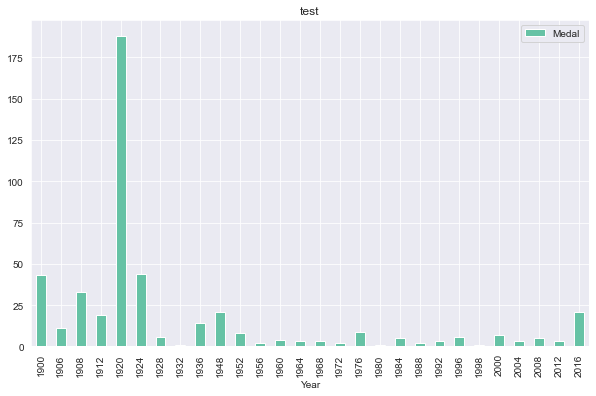

In [794]:
df_.dropna(subset=['Medal'])\
   .query('NOC=="BEL"')\
   .groupby('Year').count()[['Medal']]\
   .plot.bar(figsize=(10, 6), title='test', cmap='Set2')
   #.sort_values('Medal', ascending=False)\  

In [799]:
import plotly.express as px

In [800]:
tmp = df_.dropna(subset=['Medal'])\
         .query('NOC=="BEL"')\
         .groupby(['Year', 'Medal']).count()
tmp.head()

NOC
Year Medal      
1900 Bronze   13
     Gold      6
     Silver   24
1906 Bronze    6
     Gold      2

In [829]:
tmp

NOC
Year Medal      
1900 Bronze   13
     Gold      6
     Silver   24
1906 Bronze    6
     Gold      2
     Silver    3
1908 Bronze    8
     Gold      1
     Silver   24
1912 Bronze   11
     Gold      7
     Silver    1
1920 Bronze   66
     Gold     57
     Silver   65
1924 Bronze   11
     Gold      3
     Silver   30
1928 Bronze    5
     Silver    1
1932 Bronze    1
1936 Bronze   14
1948 Bronze    8
     Gold      7
     Silver    6
1952 Gold      5
     Silver    3
1956 Silver    2
1960 Bronze    2
     Silver    2
1964 Bronze    1
     Gold      2
1968 Bronze    2
     Silver    1
1972 Silver    2
1976 Bronze    6
     Silver    3
1980 Gold      1
1984 Bronze    2
     Gold      1
     Silver    2
1988 Bronze    2
1992 Bronze    2
     Silver    1
1996 Bronze    2
     Gold      2
     Silver    2
1998 Bronze    1
2000 Bronze    4
     Silver    3
2004 Bronze    2
     Gold      1
2008 Gold      1
     Silver    4
2012 Bronze    2
     Silver    1
2016 Bronze    2
     Gold      2
     Silver   17

In [826]:
px.sunburst(data_frame=tmp.reset_index(),
            path=['Year', 'Medal'],
            values='NOC',
            color='Medal',
            color_discrete_map={'Gold' : 'gold',
                                'Silver' : 'silver',
                                'Bronze' : '#cc4400'})

In [827]:
px.sunburst(data_frame=tmp.reset_index(),
            path=['Year'],
            values='NOC')

In [802]:
tmp.reset_index().head()

,Year,Medal,NOC
0,1900,Bronze,13
1,1900,Gold,6
2,1900,Silver,24
3,1906,Bronze,6
4,1906,Gold,2


## Quel est le classement de la Belgique par rapport aux autres pays ?

In [705]:
df_ = df[['NOC', 'Medal']].dropna(subset=['Medal'])
df_.groupby('NOC').count()\
   .nlargest(49, 'Medal')\
   .reset_index()

,NOC,Medal
0,USA,5637
1,URS,2503
2,GER,2165
3,GBR,2068
4,FRA,1777
5,ITA,1637
6,SWE,1536
7,CAN,1352
8,AUS,1320
9,RUS,1165


## Quelle est la médiane du poids et de taille dans les médaillées d’or ?

In [721]:
df_ = df[['Medal', 'Sex', 'Height', 'Weight']].dropna()

df_.query('Medal=="Gold"')\
   .groupby(['Medal', 'Sex']).median()

Height  Weight
Medal Sex                
Gold  F     170.0    63.0
      M     182.0    79.0

## Est-ce que le poids et la taille ont évolué dans le temps ?

In [722]:
df_ = df[['Year', 'Medal', 'Sex', 'Height', 'Weight']].dropna()

df_.query('Medal=="Gold"')\
   .groupby(['Year', 'Sex']).median()

Height  Weight
Year Sex                
1896 M     176.0    70.0
1900 M     182.0    74.0
1904 M     180.0    70.5
1906 M     180.0    79.0
1908 M     177.0    70.0
...          ...     ...
2012 M     185.0    82.0
2014 F     169.0    64.0
     M     183.0    81.0
2016 F     172.5    65.0
     M     185.0    82.0

[64 rows x 2 columns]

In [739]:
tmp = df_.query('Medal=="Gold"')\
   .groupby(['Year', 'Sex'])\
   .median()\
   .reset_index().set_index('Year')\

tmp

,Sex,Height,Weight
Year,,,
1896,M,176.0,70.0
1900,M,182.0,74.0
1904,M,180.0,70.5
1906,M,180.0,79.0
1908,M,177.0,70.0
...,...,...,...
2012,M,185.0,82.0
2014,F,169.0,64.0
2014,M,183.0,81.0


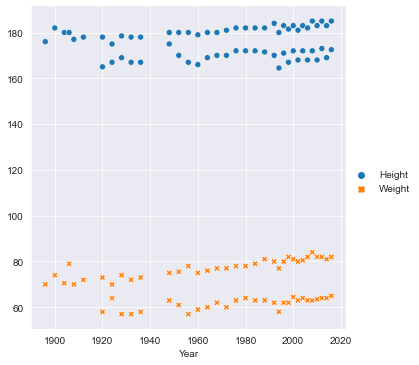

In [763]:
sns.relplot(data=tmp, kind='scatter')

In [777]:
sns.relplot(data=tmp, x=tmp.index, y=['Height', 'Weight'], kind='scatter')

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 64 and the vector passed to `y` has length 2.

## Comparez le poids et la taille par saison

## Quels sont les pays ayant accueilli le plus les Jeux olympiques

In [ ]:
df[['NOC', ]]

In [767]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [778]:
flights_wide = sns.load_dataset("flights").pivot("year", "month", "passengers")

In [779]:
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [782]:
pd.read_clipboard()

,Athens,Greece,1896,Europe,I,6,April,1896.1,15,April.1,1896.2
0,Paris,France,1900,II,14,May,1900,28,October,1900,NaN
